## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

## Generating simulated data

In [3]:
# Set seed for reproducibility
np.random.seed(42)

In [4]:
# Simulate data
num_competitors = 32
num_entries = 500

In [5]:
competitors = [f"Competitor_{i}" for i in range(1, num_competitors + 1)]
regions = ["zambia", "drc", "zimbabwe", "malawi", "mozambique"]
services = ["dedicated", "consolidated"]

In [6]:
data = {
    "Competitor": np.random.choice(competitors, num_entries),
    "Region": np.random.choice(regions, num_entries),
    "Service_Type": np.random.choice(services, num_entries),
    "Price_per_load": np.round(np.random.uniform(5000, 10500, num_entries), 2),  # Pricing range: $5000-$10500 per load
    "Delivery_Time": np.random.randint(2, 10, num_entries),  # Delivery time in days
    "Customer_Rating": np.round(np.random.uniform(2, 5, num_entries), 1),  # Rating: 2.0 to 5.0
    "Market_Share": np.round(np.random.uniform(1, 20, num_entries), 2),  # Market share in %
}

In [7]:
# Create a DataFrame
data = pd.DataFrame(data)

In [64]:
# Group by Competitor
# Aggregating numeric values and combining service types
df = data.groupby("Competitor").agg({
    "Region": lambda x: x.mode()[0],  # Most frequent region (mode)
    "Service_Type": lambda x: ", ".join(x.unique()),  # Combine unique service types
    "Market_Share": "mean",  # Average market share across entries
    "Price_per_load": "mean",  # Average price across entries
    "Delivery_Time": "mean",  # Average delivery time
    "Customer_Rating": "mean"  # Average customer rating
}).reset_index()

In [66]:
df.head().round()

,Competitor,Region,Service_Type,Market_Share,Price_per_load,Delivery_Time,Customer_Rating
0,Competitor_1,zambia,"dedicated, consolidated",9.0,7818.0,5.0,4.0
1,Competitor_10,drc,"consolidated, dedicated",10.0,7344.0,7.0,4.0
2,Competitor_11,drc,"dedicated, consolidated",12.0,7100.0,5.0,4.0
3,Competitor_12,drc,"dedicated, consolidated",12.0,8334.0,5.0,4.0
4,Competitor_13,malawi,"consolidated, dedicated",9.0,8499.0,6.0,4.0


## Data exploration

In [11]:
df.describe()

,Market_Share,Price_per_load,Delivery_Time,Customer_Rating
count,32.000000,32.000000,32.000000,32.000000
mean,10.432360,7798.996778,5.474459,3.510386
std,1.369054,356.450240,0.671716,0.206739
min,8.139286,7100.361000,4.400000,3.177778
25%,9.284475,7543.483382,5.070238,3.375000
50%,10.140251,7822.789681,5.285714,3.503571
75%,11.604921,8022.886324,5.707983,3.647500
max,12.880714,8499.385556,7.818182,4.092857


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Competitor       32 non-null     object 
 1   Region           32 non-null     object 
 2   Service_Type     32 non-null     object 
 3   Market_Share     32 non-null     float64
 4   Price_per_load   32 non-null     float64
 5   Delivery_Time    32 non-null     float64
 6   Customer_Rating  32 non-null     float64
dtypes: float64(4), object(3)
memory usage: 1.9+ KB


In [13]:
# Check for Missing Values
df.isnull().sum()


Competitor         0
Region             0
Service_Type       0
Market_Share       0
Price_per_load     0
Delivery_Time      0
Customer_Rating    0
dtype: int64

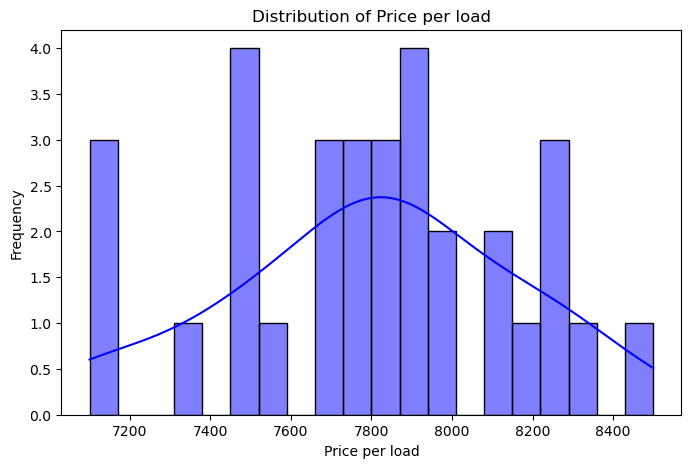

In [15]:
# Distribution of Pricing
plt.figure(figsize=(8, 5))
sns.histplot(df['Price_per_load'], bins=20, kde=True, color='blue')
plt.title('Distribution of Price per load')
plt.xlabel('Price per load')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Remove Outliers in Price_per_tonne (assuming prices outside [2, 10] are invalid)
df = df[(df["Price_per_load"] >= 5000) & (df["Price_per_load"] <= 10500)]
print(df)

       Competitor      Region             Service_Type  Market_Share  \
0    Competitor_1      zambia  dedicated, consolidated      8.993478   
1   Competitor_10         drc  consolidated, dedicated      9.897500   
2   Competitor_11         drc  dedicated, consolidated     12.060000   
3   Competitor_12         drc  dedicated, consolidated     11.903529   
4   Competitor_13      malawi  consolidated, dedicated      9.074444   
5   Competitor_14  mozambique  dedicated, consolidated     11.018182   
6   Competitor_15         drc  dedicated, consolidated     11.273571   
7   Competitor_16  mozambique  consolidated, dedicated     10.808235   
8   Competitor_17  mozambique  dedicated, consolidated     11.921765   
9   Competitor_18    zimbabwe  consolidated, dedicated      8.771111   
10  Competitor_19         drc  dedicated, consolidated      8.139286   
11   Competitor_2  mozambique  dedicated, consolidated      9.936667   
12  Competitor_20      zambia  consolidated, dedicated     11.82

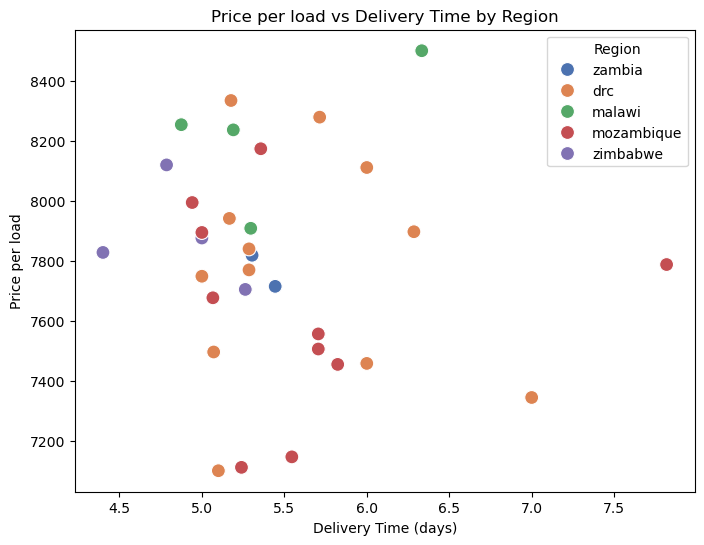

In [62]:
# Price vs Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Delivery_Time', y='Price_per_load', hue='Region', palette='deep', s=100)
plt.title('Price per load vs Delivery Time by Region')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Price per load')
plt.legend(title='Region')
plt.show()


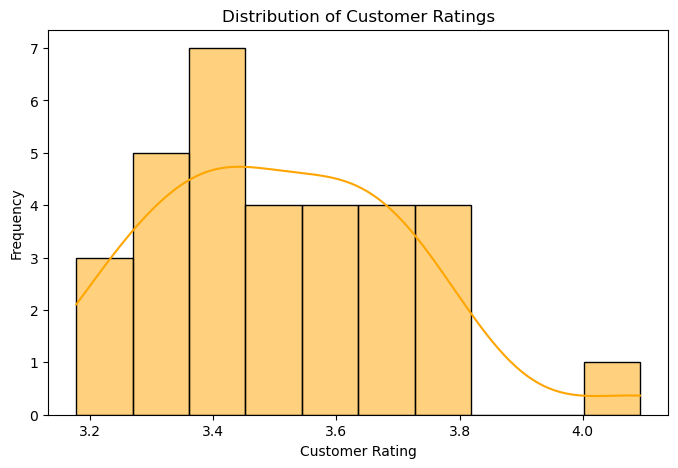

In [18]:
# Distribution of Customer Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Rating'], bins=10, kde=True, color='orange')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()


C:\Users\NHOPI\AppData\Local\Temp\ipykernel_11560\1122033858.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Market_Share', palette='Set2')


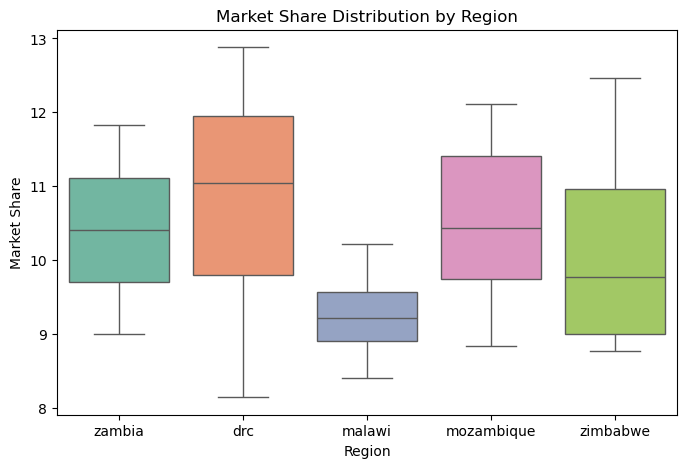

In [56]:
# Normalized Market Share Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Region', y='Market_Share', palette='Set2')
plt.title('Market Share Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Market Share')
plt.show()

## Feature selection

In [20]:
X = df[['Price_per_load', 'Region', 'Service_Type', 'Delivery_Time']]
y = df['Market_Share']

## Encode categorical features

In [21]:
X = pd.get_dummies(X, columns=['Region', 'Service_Type'], drop_first=True)

## Train-test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit the model

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Evaluate the model

In [24]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1.7539097769658527


## Example prediction

In [26]:
sample_input = pd.DataFrame({
    'Price_per_load': [5.5],
    'Delivery_Time': [3],
    'Region_malawi': [1],
    'Region_mozambique': [0],
    'Region_zambia': [0],
    'Region_zimbabwe': [0],
    'Service_Type_dedicated, consolidated': [1],
    
    })

In [27]:
predicted_market_share = model.predict(sample_input)

In [28]:
print(f"Predicted Market Share: {predicted_market_share}")


Predicted Market Share: [10.70193539]


## **Insights**

### Pricing vs. Delivery Time:
* Competitors with faster delivery times generally charge higher prices, suggesting that customers value speed and are willing to pay a premium.
* Regions like DRC and Mozambique exhibit varying price sensitivities, indicating the need for region-specific pricing strategies.

### Customer Ratings Impact:
* Higher customer ratings tend to correlate with better market share. Competitors excelling in customer satisfaction likely enjoy increased customer loyalty and retention.

### Market Share Distribution:
* Regions like Zambia and Malawi show relatively balanced market share distributions, while DRC has dominant players with outliers. This indicates high competition in some regions and potential monopolistic tendencies in others.

### Service Type Preferences:
* Combining dedicated and consolidated services is a common strategy. However, regions like Malawi show stronger preferences for specific service types, hinting at potential niche market opportunities.

### Feature Importance (Random Forest Model):
* Price per load and delivery time are the most significant predictors of market share, followed by regional factors. This highlights the importance of balancing competitive pricing with operational efficiency.

## **Recommendations**

### Optimize Pricing Strategies:
* Use predictive analytics to identify the optimal price range in each region, maximizing market share without sacrificing margins.

### Focus on Delivery Efficiency:
* Invest in logistics to reduce delivery times, especially in regions with higher sensitivity to speed (e.g., Zimbabwe and Mozambique).

### Enhance Customer Experience:
* Prioritize improving customer satisfaction scores, as even small improvements in ratings can significantly impact market share.
* Implement feedback mechanisms to gather customer insights and address pain points.

### Leverage Regional Trends:
* Customize service offerings based on regional preferences. For example, invest more in consolidated services in regions like Malawi and dedicated services in Zambia.

### Competitive Benchmarking:
* Analyze top competitors with high market shares to identify best practices in pricing, service quality, and operational efficiency.

### Expand Analytics:
* Incorporate additional factors like fuel costs, road conditions, or seasonal variations for more robust predictive modeling and strategic planning.